Subiectul 1:

In [ ]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.6/164.6 kB 3.1 MB/s eta 0:00:00


In [37]:
from hmmlearn import hmm
import numpy as np
import matplotlib.pyplot as plt

# Dimensiunea gridului
dimensiune_grid = (10, 10)

# Lista de culori predefinite
culori = [
    "red", "blue", "green", "yellow",
    "purple", "orange", "pink", "cyan",
    "brown", "lime"
]

# Generarea gridului cu culori
np.random.seed(42)
grid_culori = np.random.choice(culori, size=dimensiune_grid)

# Observațiile de culori
observatii = ["red", "red", "lime", "yellow", "blue"]

# Mapare culori -> indecși
culoare_to_idx = {culoare: idx for idx, culoare in enumerate(culori)}
idx_to_culoare = {idx: culoare for culoare, idx in culoare_to_idx.items()}

# Transformăm secvența de observații în indecși
observatii_idx = [culoare_to_idx[c] for c in observatii]

# Definim stările ascunse ca fiind toate pozițiile din grid (100 de stări)
numar_stari = dimensiune_grid[0] * dimensiune_grid[1]
stari_ascunse = [(i, j) for i in range(dimensiune_grid[0]) for j in range(dimensiune_grid[1])]
stare_to_idx = {stare: idx for idx, stare in enumerate(stari_ascunse)}
idx_to_stare = {idx: stare for stare, idx in stare_to_idx.items()}

# Matrice de tranziție
transitions = np.zeros((numar_stari, numar_stari))

for i, j in stari_ascunse:
    current_idx = stare_to_idx[(i, j)]
    vecini = [
        (i, j),          # pe loc
        (i + 1, j),      # jos
        (i - 1, j),      # sus
        (i, j - 1),      # stanga
        (i, j + 1)       # dreapta
    ]
    vecini_valizi = [stare_to_idx[(x, y)] for x, y in vecini if 0 <= x < 10 and 0 <= y < 10]
    prob = 1 / len(vecini_valizi)
    for vecin in vecini_valizi:
        transitions[current_idx, vecin] = prob

# Matrice de emisie
emissions = np.zeros((numar_stari, len(culori)))

for i in range(dimensiune_grid[0]):
    for j in range(dimensiune_grid[1]):
        idx = stare_to_idx[(i, j)]
        culoare = grid_culori[i, j]
        emissions[idx, culoare_to_idx[culoare]] = 1

# Modelul HMM
model = hmm.MultinomialHMM(n_components=numar_stari, n_iter=1000)

# Parametrii de inițializare
model.startprob_ = np.full(numar_stari, 1 / numar_stari)
model.transmat_ = transitions
model.means_ = np.zeros((numar_stari, 1))
model.covars_ = np.full((numar_stari, 1, 1), 1e-2)

# Rulăm algoritmul Viterbi pentru secvența de observații
observatii_array = np.array(observatii_idx).reshape(-1, 1)
logprob, secventa_stari = model.decode(observatii_array, algorithm="viterbi")

# Convertim secvența de stări în poziții din grid
drum = [idx_to_stare[idx] for idx in secventa_stari]

# Vizualizăm drumul pe grid
fig, ax = plt.subplots(figsize=(8, 8))
for i in range(dimensiune_grid[0]):
    for j in range(dimensiune_grid[1]):
        culoare = grid_culori[i, j]
        ax.add_patch(plt.Rectangle((j, dimensiune_grid[0] - i - 1), 1, 1, color=culoare))
        ax.text(j + 0.5, dimensiune_grid[0] - i - 0.5, culoare,
                color="white", ha="center", va="center", fontsize=8, fontweight="bold")

# Evidențiem drumul rezultat
for idx, (i, j) in enumerate(drum):
    ax.add_patch(plt.Circle((j + 0.5, dimensiune_grid[0] - i - 0.5), 0.3, color="black", alpha=0.7))
    ax.text(j + 0.5, dimensiune_grid[0] - i - 0.5, str(idx + 1),
            color="white", ha="center", va="center", fontsize=10, fontweight="bold")

# Setări axă
ax.set_xlim(0, dimensiune_grid[1])
ax.set_ylim(0, dimensiune_grid[0])
ax.set_xticks(range(dimensiune_grid[1]))
ax.set_yticks(range(dimensiune_grid[0]))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(visible=True, color="black", linewidth=0.5)
ax.set_aspect("equal")
plt.title("Drumul rezultat al starilor ascunse", fontsize=14)
plt.show()

print(f"Drumul cel mai probabil: {drum}")
print(f"Probabilitatea drumului: {logprob:.4f}")


https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


AttributeError: 'MultinomialHMM' object has no attribute 'emissionprob_'

Subiectul 3:

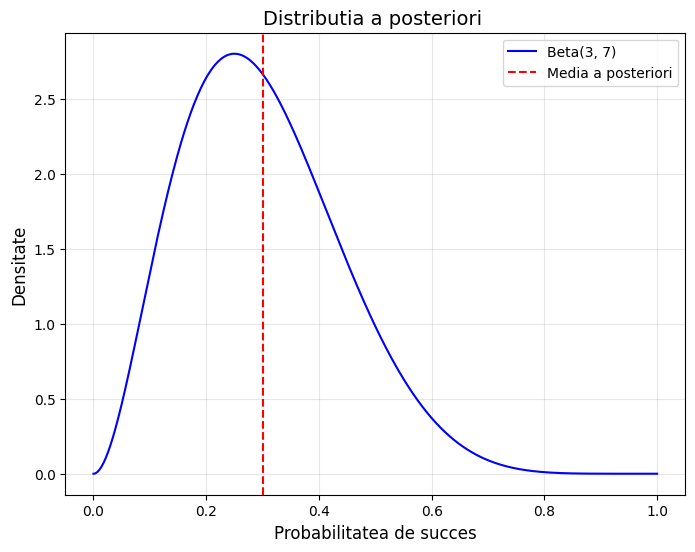

In [28]:
#1.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta


alpha_post = 3
beta_post = 7

val = np.linspace(0, 1, 500)

posterior_density = beta.pdf(val, alpha_post, beta_post)

plt.figure(figsize=(8, 6))
plt.plot(val, posterior_density, label=f'Beta({alpha_post}, {beta_post})', color='blue')
plt.title("Distributia a posteriori ", fontsize=14)
plt.xlabel("Probabilitatea de succes", fontsize=12)
plt.ylabel("Densitate", fontsize=12)
plt.axvline(alpha_post / (alpha_post + beta_post), color="red", linestyle="--", label="Media a posteriori")
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()


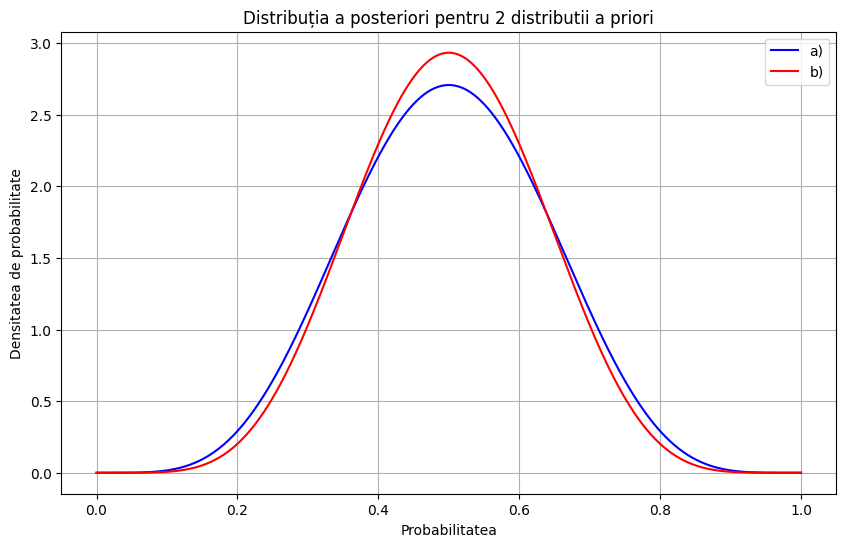

In [22]:
from re import S
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

alfa_prior1 = 1
beta_prior1 = 1

alfa_prior2 = 2
beta_prior2 = 2

b = 5
s = 5

alfa_post1 = alfa_prior1 + b
beta_post1 = beta_prior1 + s

alfa_post2 = alfa_prior2 + b
beta_post2 = beta_prior2 + s

val = np.linspace(0, 1, 1000)

posterior1 = beta.pdf(val, alfa_post1, beta_post1)
posterior2 = beta.pdf(val, alfa_post2, beta_post2)

plt.figure(figsize=(10, 6))
plt.plot(val, posterior1, label="a)", color="blue")
plt.plot(val, posterior2, label="b)", color="red")
plt.title("Distribuția a posteriori pentru 2 distributii a priori")
plt.xlabel("Probabilitatea")
plt.ylabel("Densitatea de probabilitate")
plt.legend()
plt.grid(True)

plt.show()

#Diferenta dintre cele doua distributii a posteriori ar fi că distributia cu prior Beta(2, 2) are o varianta mai mica si o probabilitate mai concentrată in jurul valorii 0.5.
#Iar, distributia cu prior Beta(1, 1) indica o incertitudine mai mare initiala